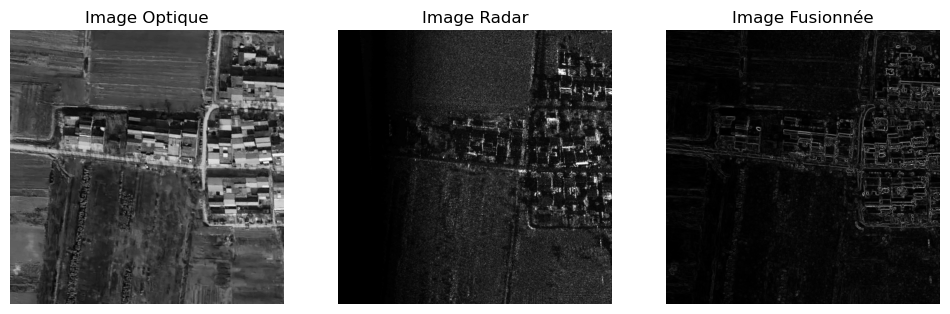

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_gradient(image):
    """Calculer le gradient d'une image."""
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    return gradient_magnitude

def normalize(image):
    """Normaliser l'image pour qu'elle soit entre 0 et 1."""
    return (image - np.min(image)) / (np.max(image) - np.min(image))

def gradient_transfer_fusion(image_radar, image_optical):
    """Fusionner les images radar et optique par transfert de gradient."""
    
    # Calculer les gradients
    gradient_radar = compute_gradient(image_radar)
    gradient_optical = compute_gradient(image_optical)

    # Normaliser les gradients
    gradient_radar_norm = normalize(gradient_radar)
    gradient_optical_norm = normalize(gradient_optical)

    # Fusionner les gradients
    fused_gradient = np.maximum(gradient_radar_norm, gradient_optical_norm)

    # Reconstruire l'image fusionnée
    if image_radar.ndim == 2:  # Si l'image est en niveaux de gris
        fused_image = fused_gradient * 0.5 * (image_radar + image_optical)
    else:  # Si l'image est en couleur
        fused_image = np.zeros_like(image_radar)
        for i in range(image_radar.shape[2]):
            fused_image[:, :, i] = fused_gradient * 0.5 * (image_radar[:, :, i] + image_optical[:, :, i])

    return fused_image

# Charger les images
image_optical = cv2.imread('/home/francis/Bureau/formation_Memoire/Optical1/4.png')
image_radar = cv2.imread('/home/francis/Bureau/formation_Memoire/SAR/4.png')

# Convertir les images en niveaux de gris si nécessaire
if image_optical.ndim == 3:
    image_optical = cv2.cvtColor(image_optical, cv2.COLOR_BGR2GRAY)
if image_radar.ndim == 3:
    image_radar = cv2.cvtColor(image_radar, cv2.COLOR_BGR2GRAY)

# Assurez-vous que les images ont la même taille
image_radar = cv2.resize(image_radar, (image_optical.shape[1], image_optical.shape[0]))

# Fusionner les images
fused_image = gradient_transfer_fusion(image_radar, image_optical)

# Afficher les images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_optical, cmap='gray')
plt.title('Image Optique')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_radar, cmap='gray')
plt.title('Image Radar')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(fused_image, cmap='gray')
plt.title('Image Fusionnée')
plt.axis('off')

plt.show()
